In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('health_care_diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Columns to treat missing values
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [7]:
# Replace zeros with NaN
df[columns_with_missing_values] = df[columns_with_missing_values].replace(0, np.nan)

In [8]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
# Fill NaN with median values of respective columns
df[columns_with_missing_values] = df[columns_with_missing_values].fillna(df[columns_with_missing_values].median())

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

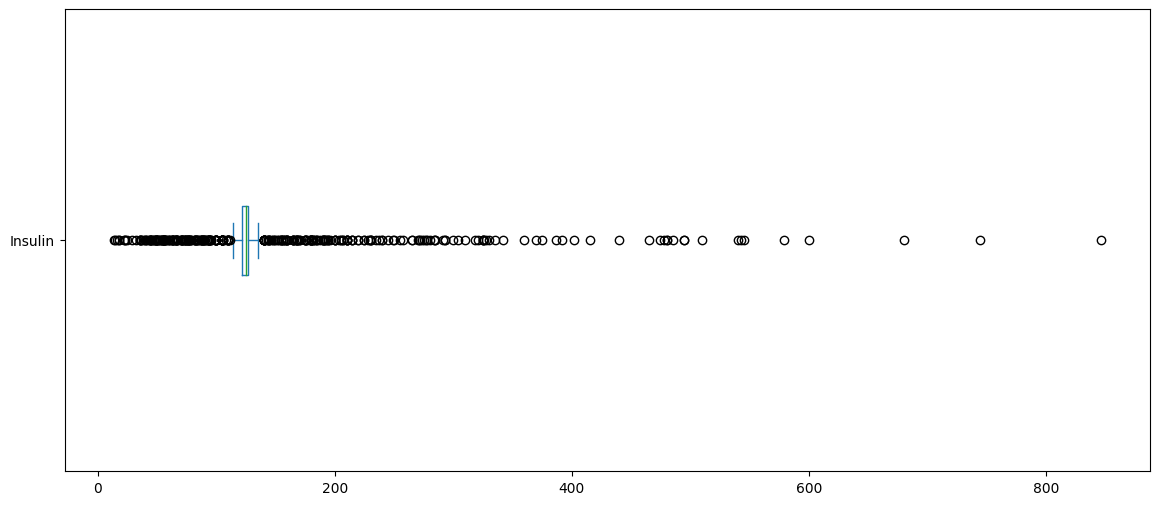

In [12]:
df['Insulin'].plot(kind='box', vert=False, figsize=(14,6))

In [13]:
df.duplicated().sum()

0

In [14]:
def clean_data_iqr(df):
    # Separate categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Define IQR method
    def iqr_method(col):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        cleaned_data = df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        outlier_data = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
        return cleaned_data, outlier_data

    cleaned_numerical_cols = []
    outlier_numerical_cols = []

    # Clean numerical columns using IQR method
    for col in numerical_cols:
        cleaned_data, outlier_data = iqr_method(col)
        cleaned_numerical_cols.append(cleaned_data)
        outlier_numerical_cols.append(outlier_data)
        df[col]=cleaned_data

    # Combine cleaned numerical columns with categorical columns
    clean_data = pd.concat([df[categorical_cols]] + cleaned_numerical_cols, axis=1)
    outlier_data = pd.concat([df[categorical_cols]] + outlier_numerical_cols, axis=1)
    
    return clean_data, outlier_data

In [15]:
# Clean the data using the IQR method
cleaned_df, outlier_df = clean_data_iqr(df)

# Print the cleaned data
cleaned_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,NaN,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,NaN,43.1,NaN,33.0,1


In [16]:
cleaned_df.shape

(768, 9)

<Axes: >

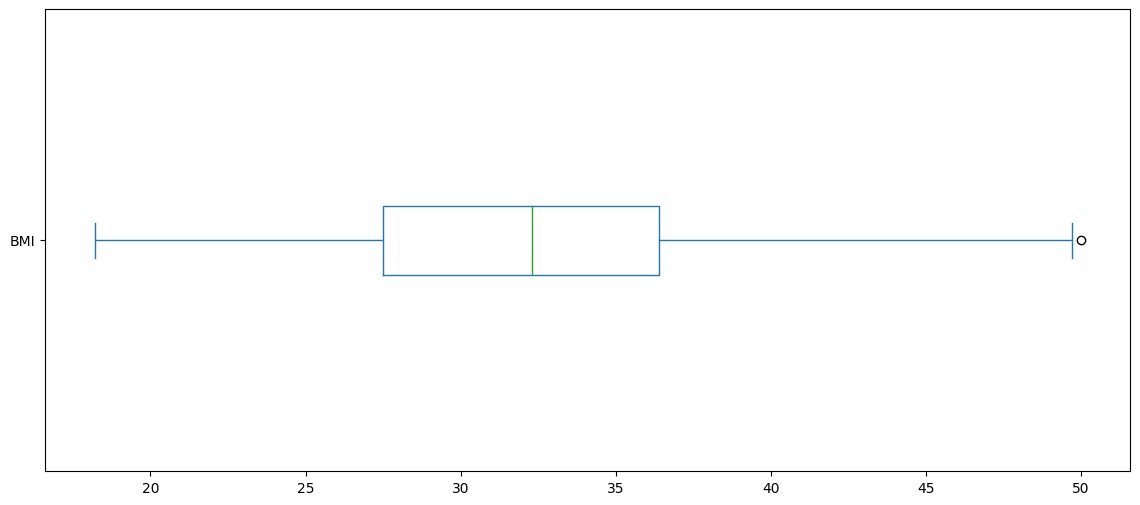

In [17]:
df['BMI'].plot(kind='box', vert=False, figsize=(14,6))

In [18]:
cleaned_df.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,NaN,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,NaN,43.1,NaN,33.0,1
5,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,NaN,31.0,0.248,26.0,1
7,10.0,115.0,72.0,29.0,125.0,35.3,0.134,29.0,0
8,2.0,197.0,70.0,NaN,NaN,30.5,0.158,53.0,1
9,8.0,125.0,96.0,29.0,125.0,32.3,0.232,54.0,1


In [19]:
cleaned_df.isnull().sum()

Pregnancies                   4
Glucose                       0
BloodPressure                14
SkinThickness                87
Insulin                     346
BMI                           8
DiabetesPedigreeFunction     29
Age                           9
Outcome                       0
dtype: int64

In [20]:
# Fill NaN with median values of respective columns
cleaned_df[columns_with_missing_values] = cleaned_df[columns_with_missing_values].fillna(cleaned_df[columns_with_missing_values].median())

In [21]:
cleaned_df['Pregnancies'].fillna(cleaned_df['Pregnancies'].median(),inplace=True)
cleaned_df['DiabetesPedigreeFunction'].fillna(cleaned_df['DiabetesPedigreeFunction'].median(),inplace=True)
cleaned_df['Age'].fillna(cleaned_df['Age'].median(),inplace=True)

In [22]:
cleaned_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

cleaned_df.to_csv(r'C:\Users\Family\Desktop\Python\heatlthcare_clean_data.csv', index=False)

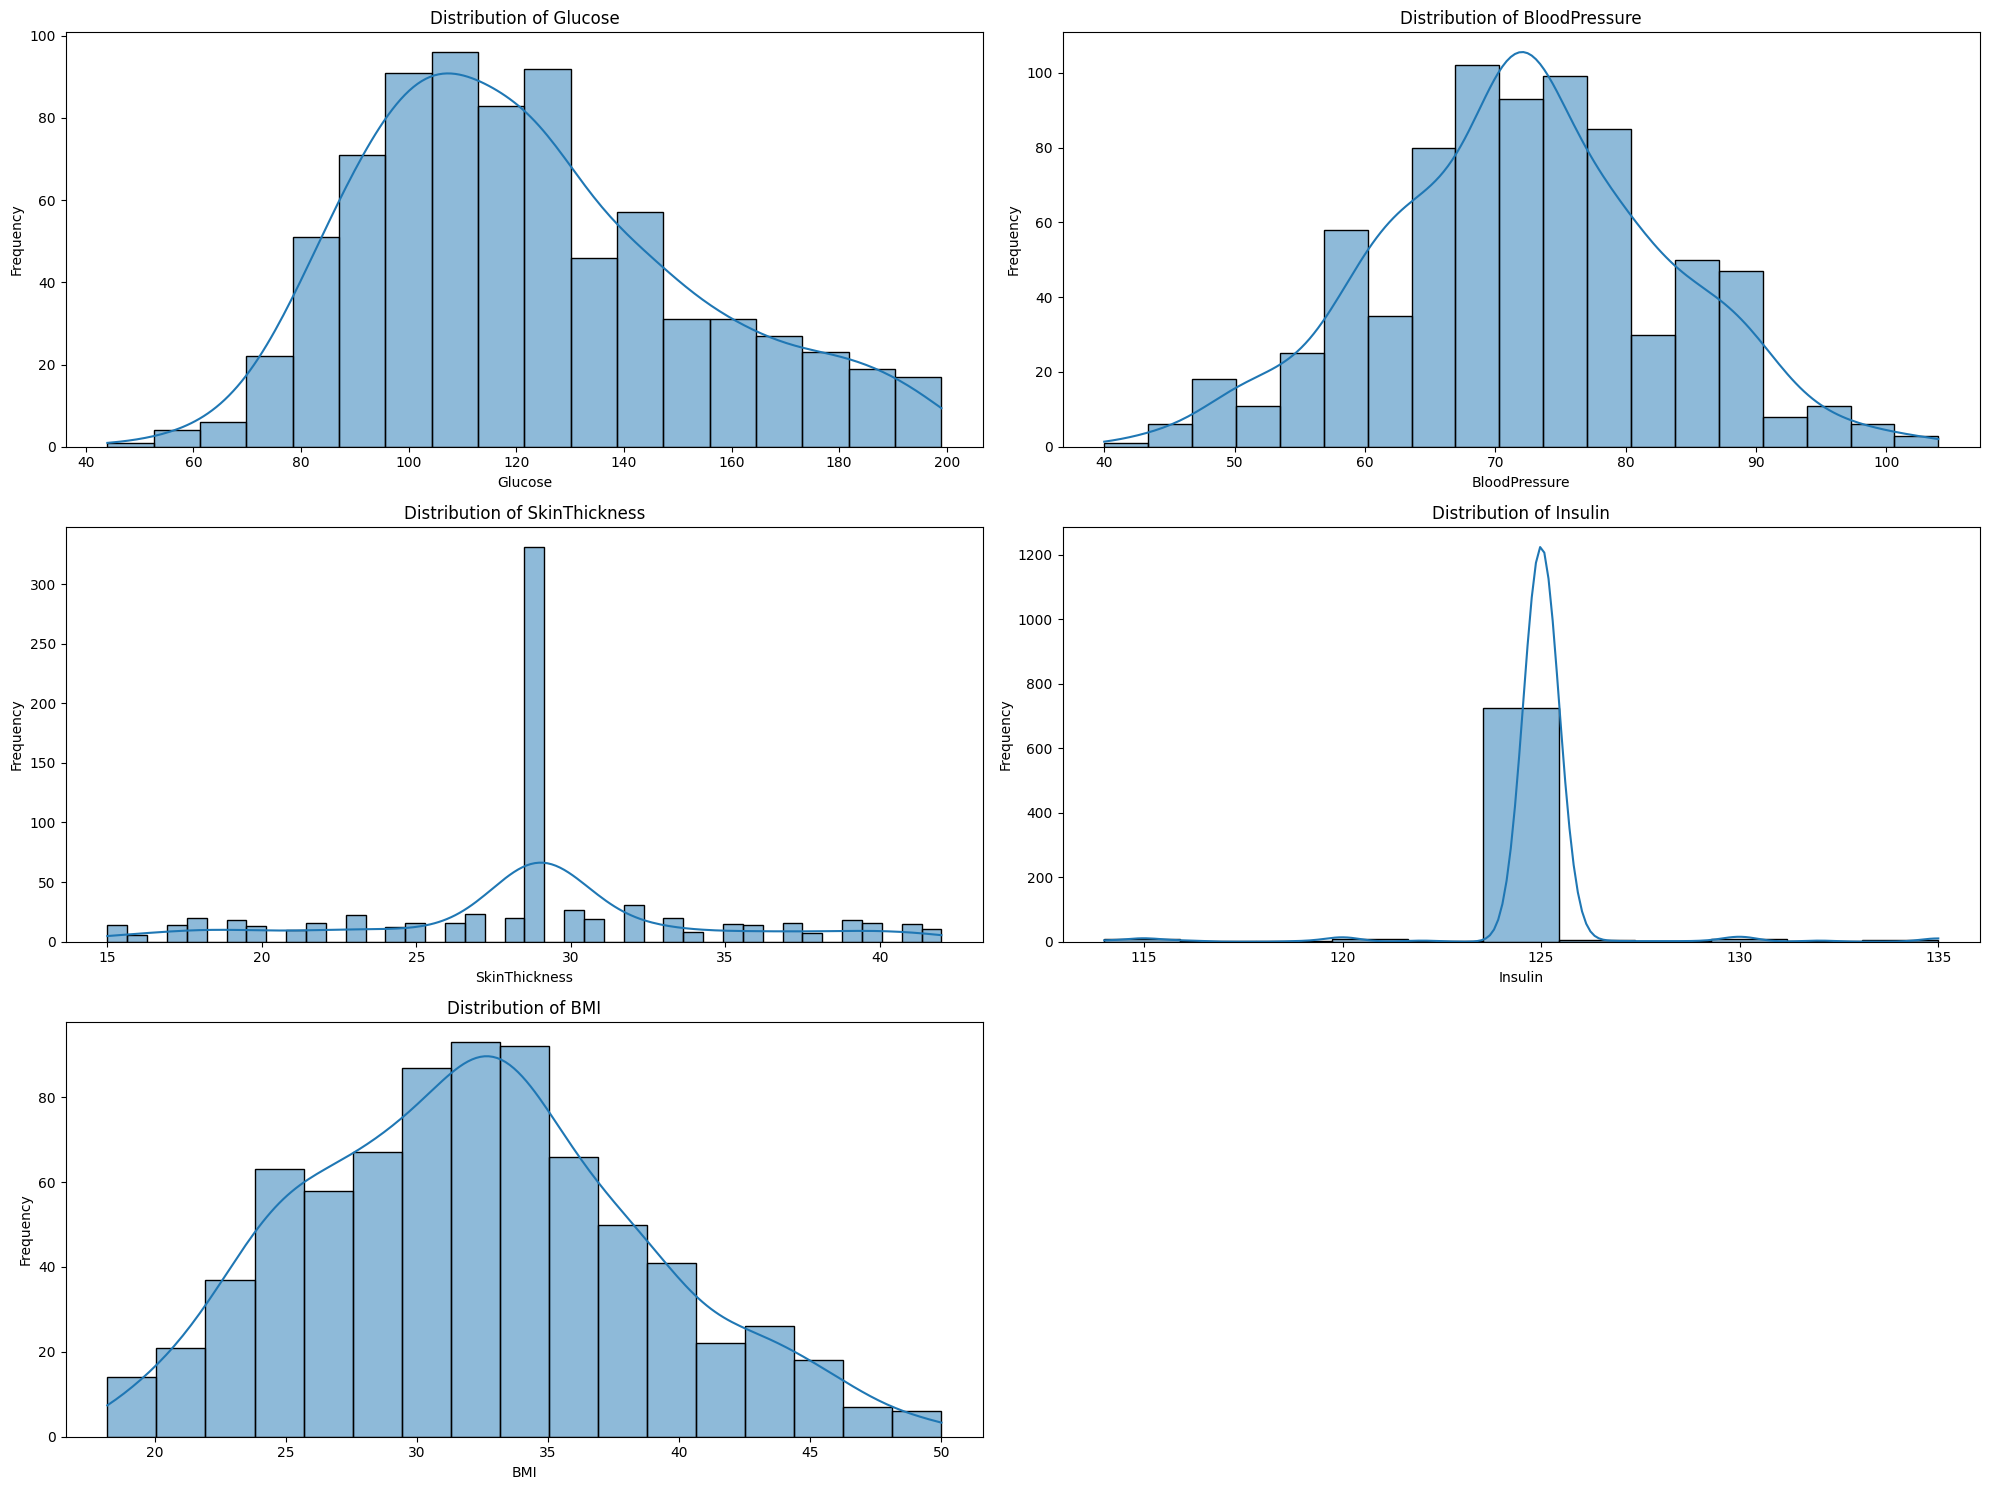

In [23]:
# Step 2: Histograms
plt.figure(figsize=(20, 15))

for i, column in enumerate(columns_with_missing_values):
    plt.subplot(3, 2, i + 1)
    sns.histplot(cleaned_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

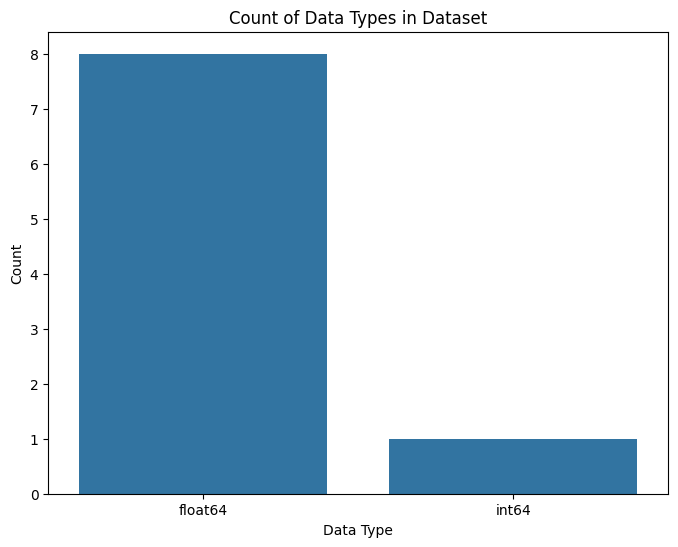

In [24]:
# Step 3: Count Plot of Data Types
data_types = cleaned_df.dtypes.value_counts().reset_index()
data_types.columns = ['Data Type', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Data Type', y='Count', data=data_types)
plt.title('Count of Data Types in Dataset')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

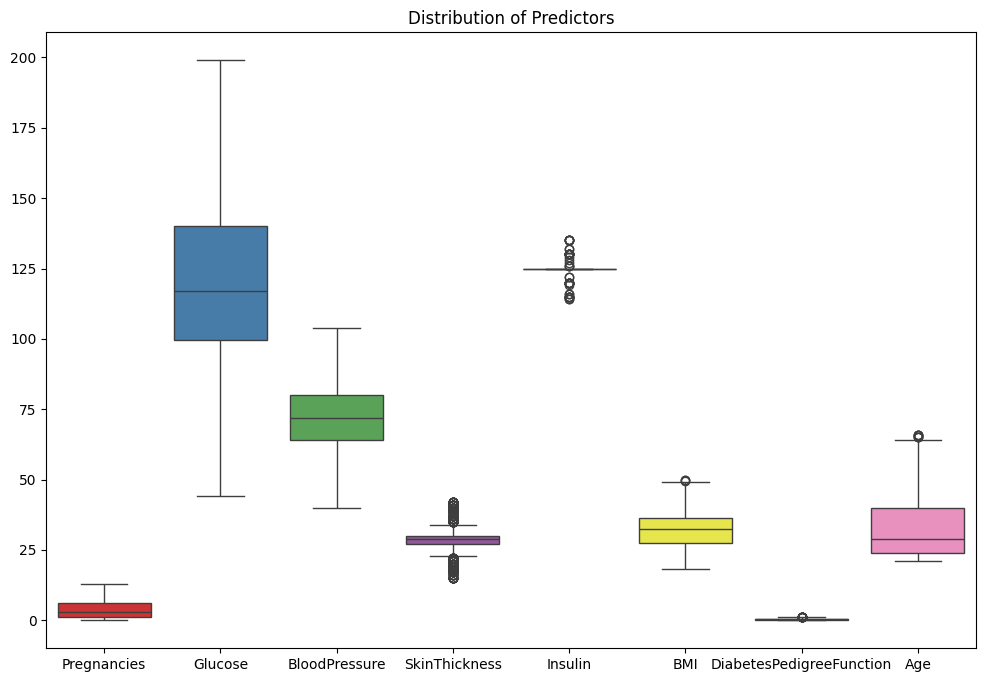

In [25]:
# Create Box and whisker plot and analyze the distribution for of all predictors
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']], palette='Set1')
plt.title('Distribution of Predictors')
plt.show()

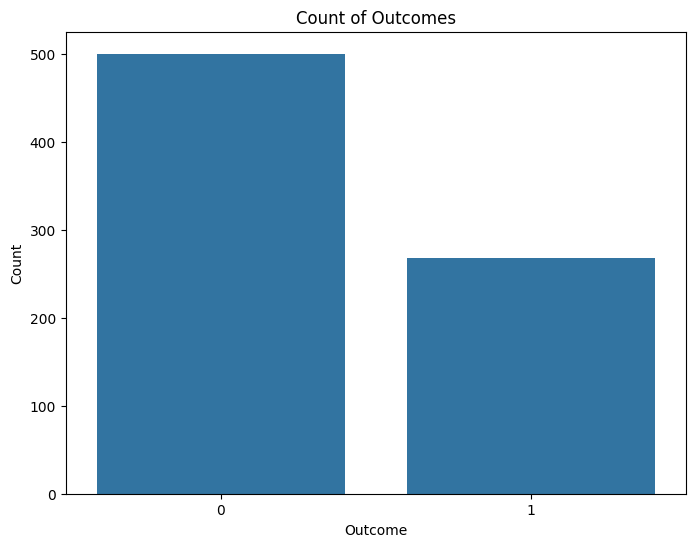

Counts of outcomes:
Outcome
0    500
1    268
Name: count, dtype: int64
The dataset is imbalanced. Class 0 (no diabetes) is more frequent than class 1 (diabetes).


In [26]:
# Step 1: Check the balance of the data
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=cleaned_df)
plt.title('Count of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Description of findings
outcome_counts = cleaned_df['Outcome'].value_counts()
print("Counts of outcomes:")
print(outcome_counts)

if outcome_counts[0] > outcome_counts[1]:
    print("The dataset is imbalanced. Class 0 (no diabetes) is more frequent than class 1 (diabetes).")
else:
    print("The dataset is balanced or nearly balanced.")


C:\Users\Family\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


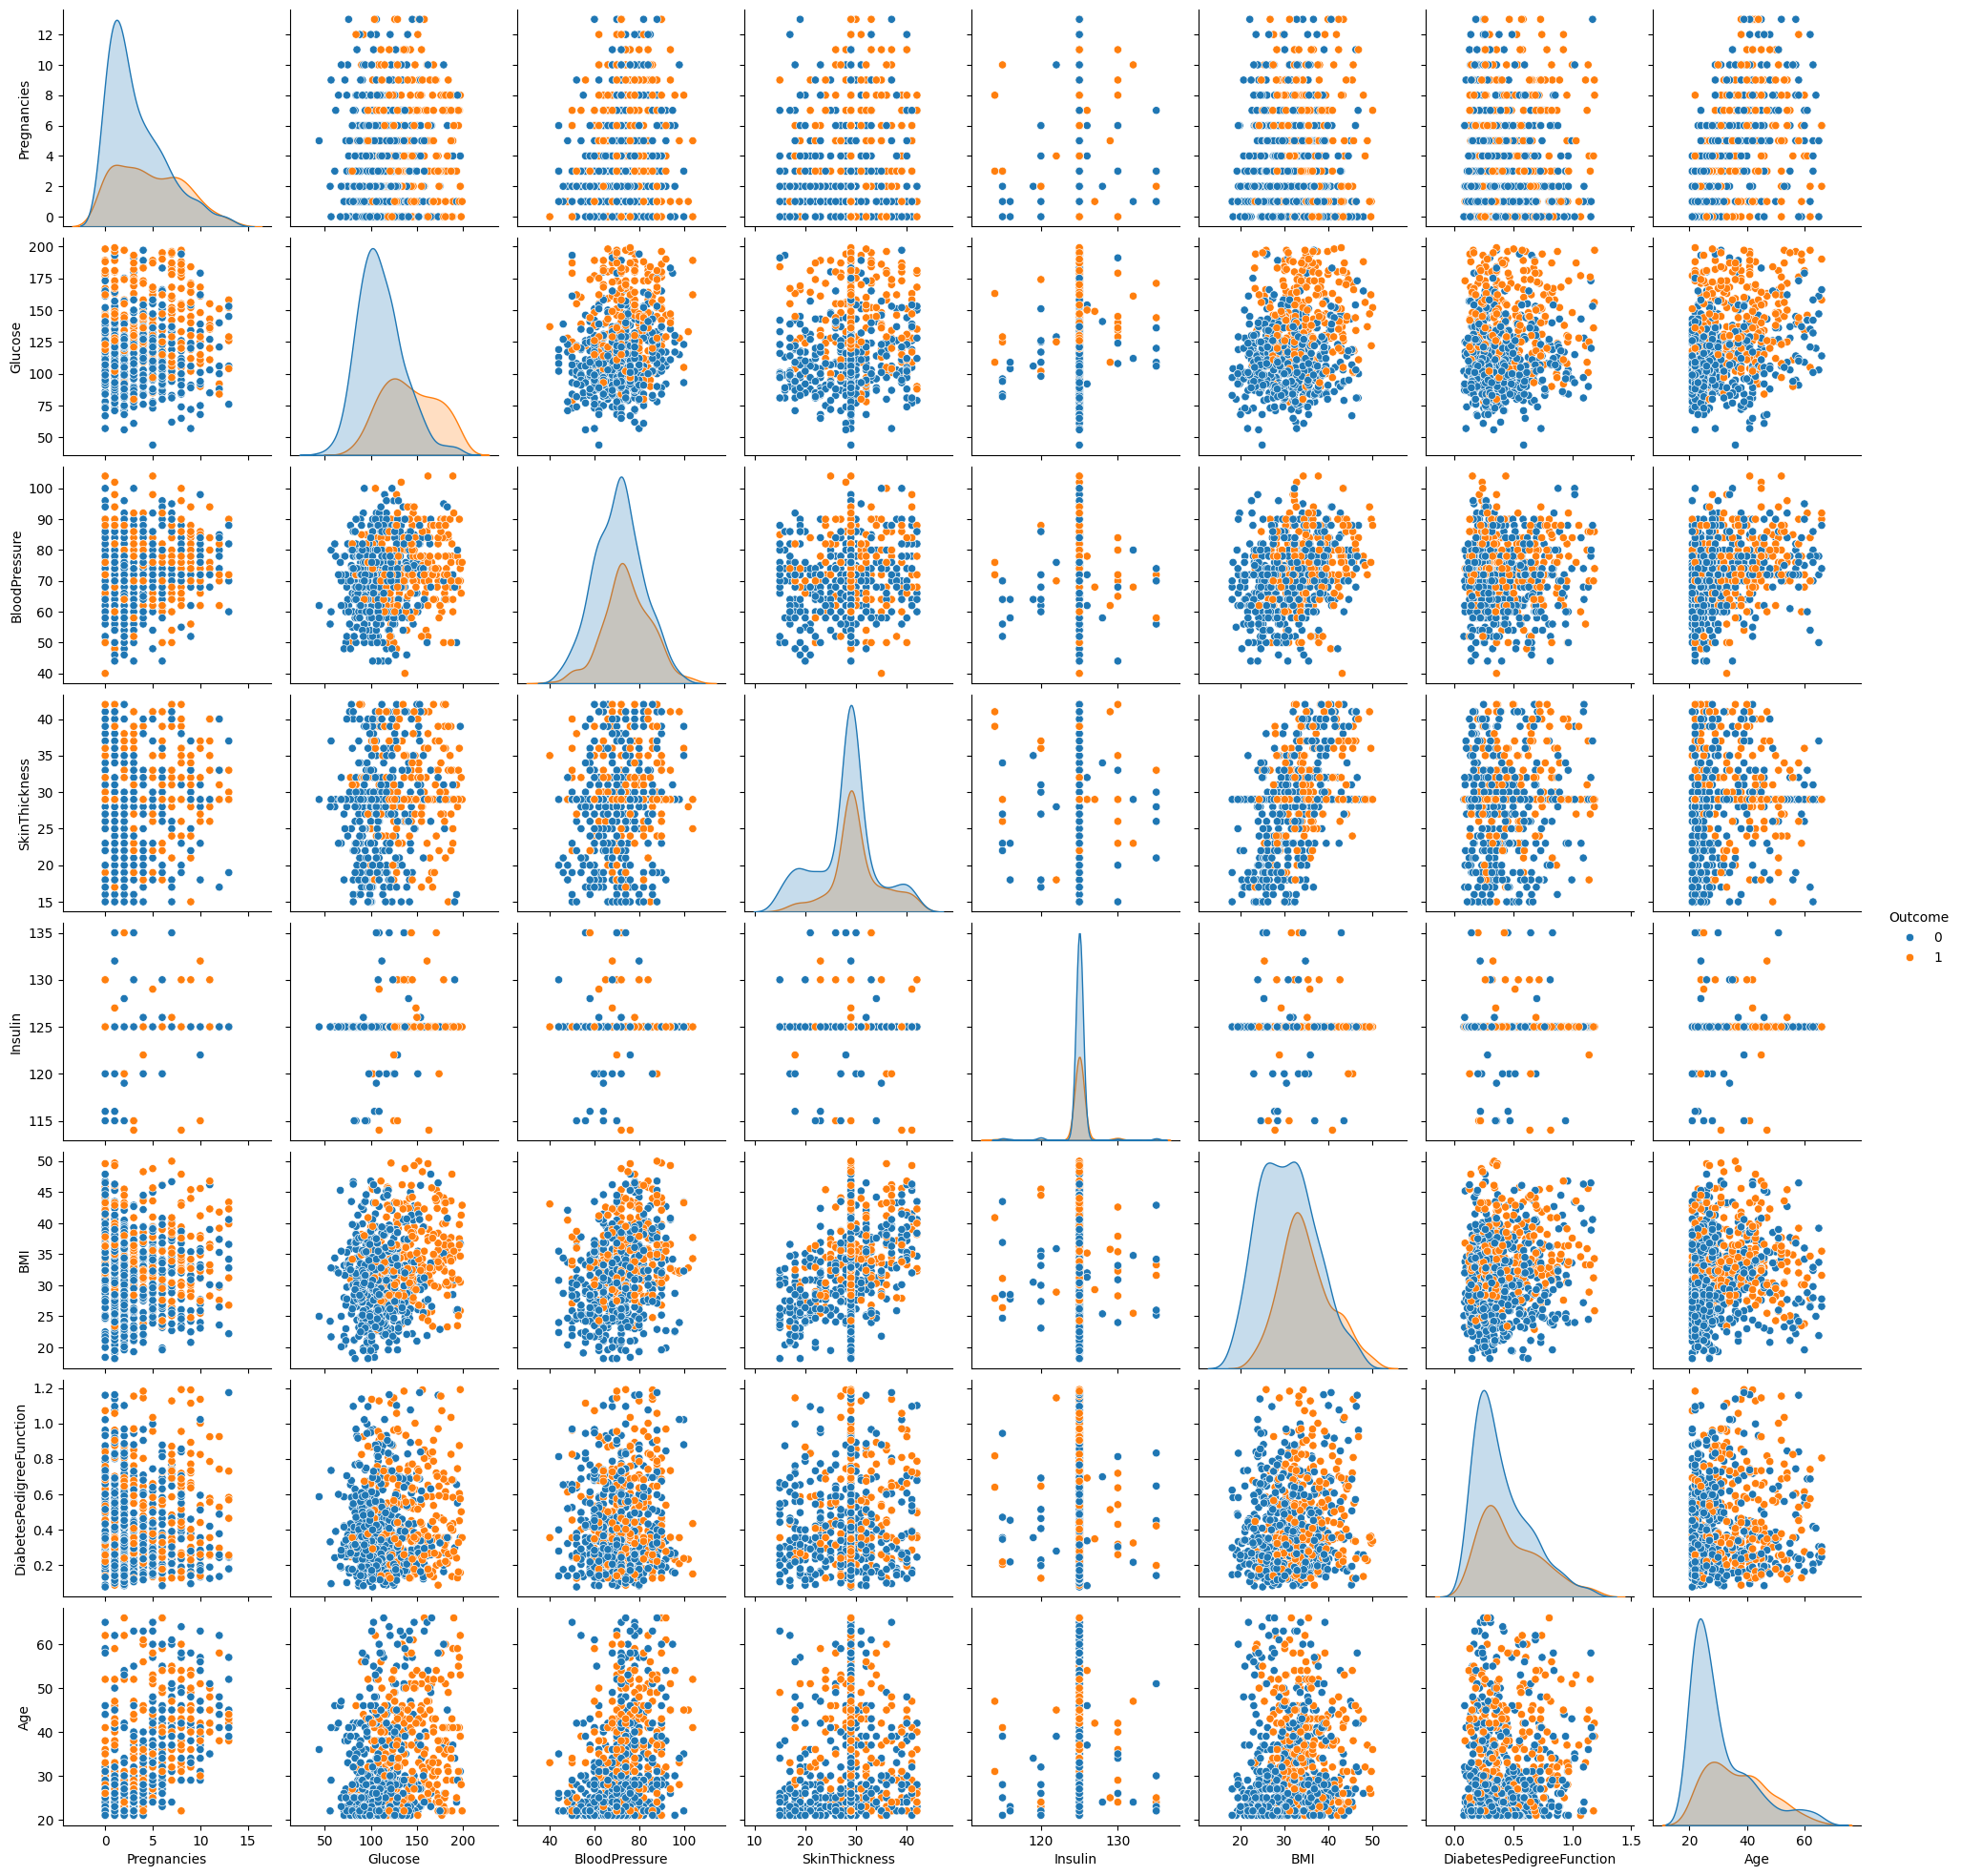

In [27]:
# Step 2: Create 2D scatter charts between pairs of variables
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Pairwise scatter plots
sns.pairplot(cleaned_df[variables + ['Outcome']], hue='Outcome')
plt.show()

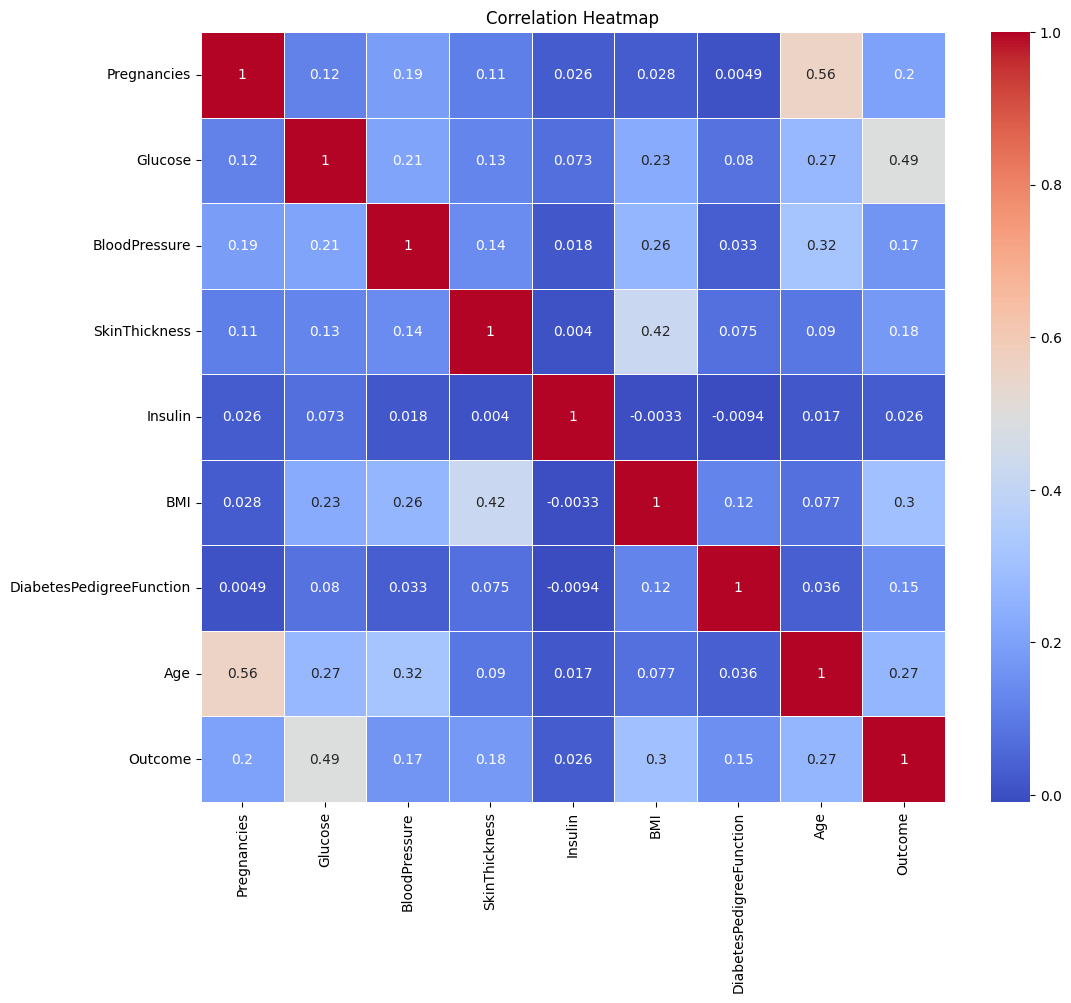

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.117692       0.188720       0.109070   
Glucose                      0.117692  1.000000       0.208368       0.126562   
BloodPressure                0.188720  0.208368       1.000000       0.142738   
SkinThickness                0.109070  0.126562       0.142738       1.000000   
Insulin                      0.026389  0.072931       0.018162       0.003986   
BMI                          0.028173  0.228111       0.263335       0.422464   
DiabetesPedigreeFunction     0.004937  0.080436       0.033419       0.075016   
Age                          0.560768  0.274264       0.316307       0.089897   
Outcome                      0.202492  0.492782       0.166424       0.178505   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.026389  0.028173                  0.004937   
Glucose              

In [28]:
# Step 3: Perform correlation analysis and heat map
correlation_matrix = cleaned_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Description of findings
print("Correlation Matrix:")
print(correlation_matrix)

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [30]:
# Separate input features and target variable
X = cleaned_df.drop('Outcome', axis=1)
y = cleaned_df['Outcome']

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
 # Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Support Vector Machine': SVC(random_state=42, class_weight='balanced',probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [34]:
# SMOTE and undersampling
smote = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

Model: Logistic Regression
Accuracy: 0.7013
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       100
           1       0.56      0.67      0.61        54

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.70      0.71       154



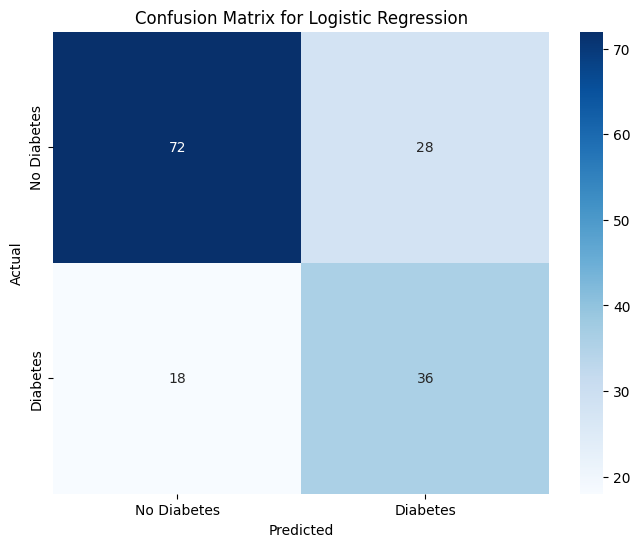

Sensitivity (Recall): 0.6667
Specificity: 0.7200
ROC AUC: 0.8017


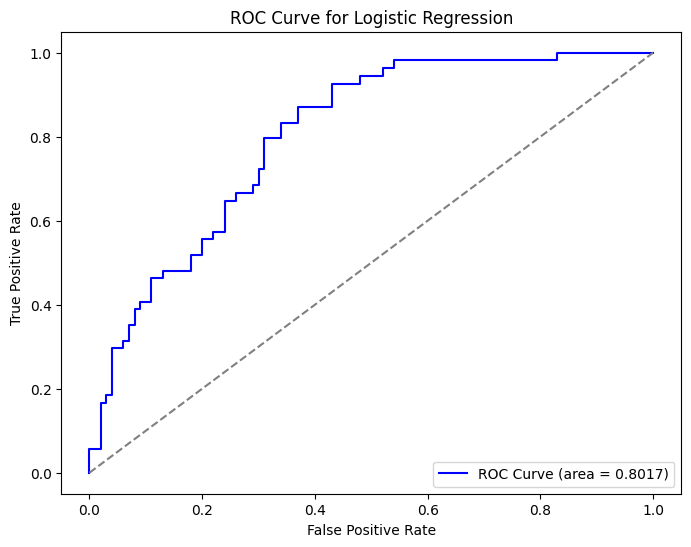

Cross-validation Mean Accuracy: 0.7362

Model: Random Forest
Accuracy: 0.7532
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       100
           1       0.62      0.78      0.69        54

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.76       154



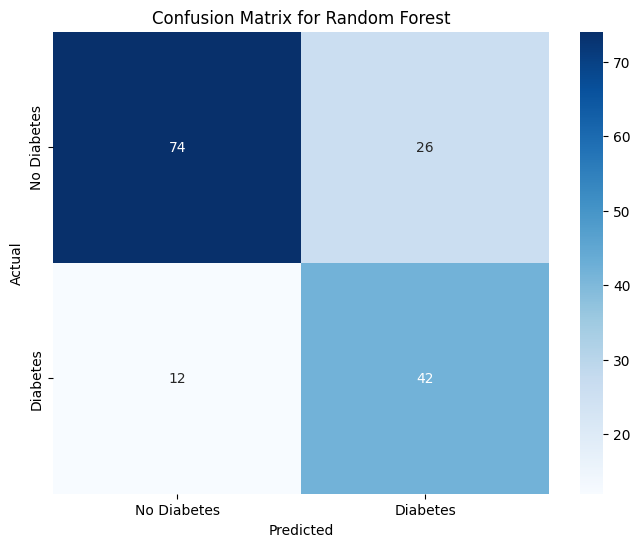

Sensitivity (Recall): 0.7778
Specificity: 0.7400
ROC AUC: 0.8021


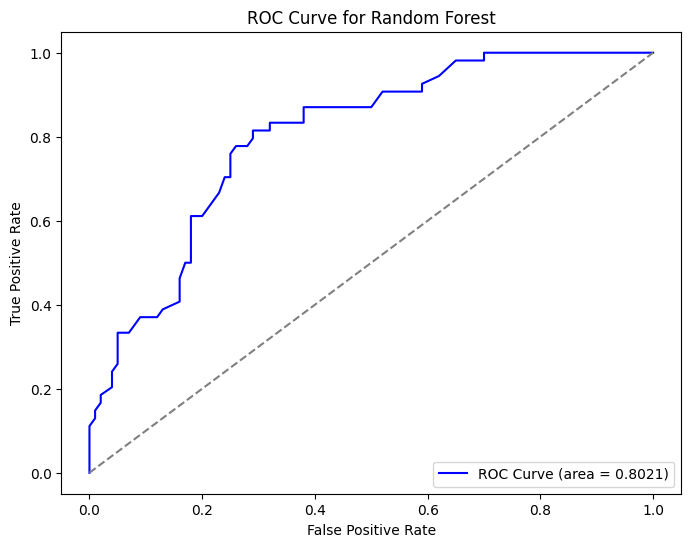

Cross-validation Mean Accuracy: 0.7329

Model: Support Vector Machine
Accuracy: 0.7143
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.58      0.67      0.62        54

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.73      0.71      0.72       154



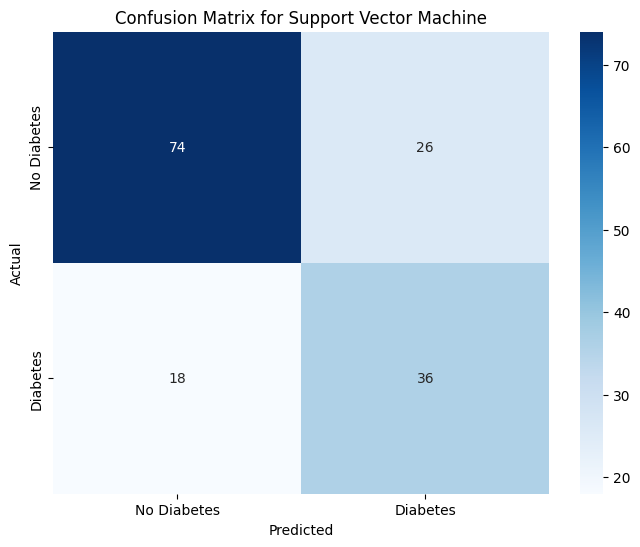

Sensitivity (Recall): 0.6667
Specificity: 0.7400
ROC AUC: 0.7950


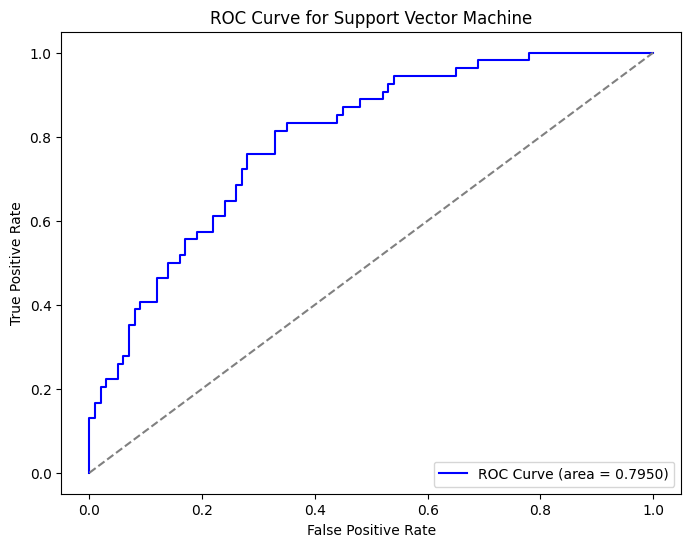

Cross-validation Mean Accuracy: 0.7378

Model: K-Nearest Neighbors
Accuracy: 0.7208
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       100
           1       0.59      0.67      0.63        54

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



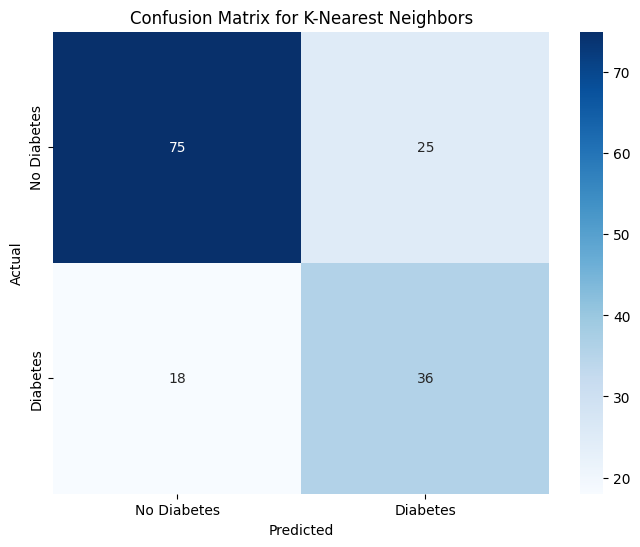

Sensitivity (Recall): 0.6667
Specificity: 0.7500
ROC AUC: 0.7680


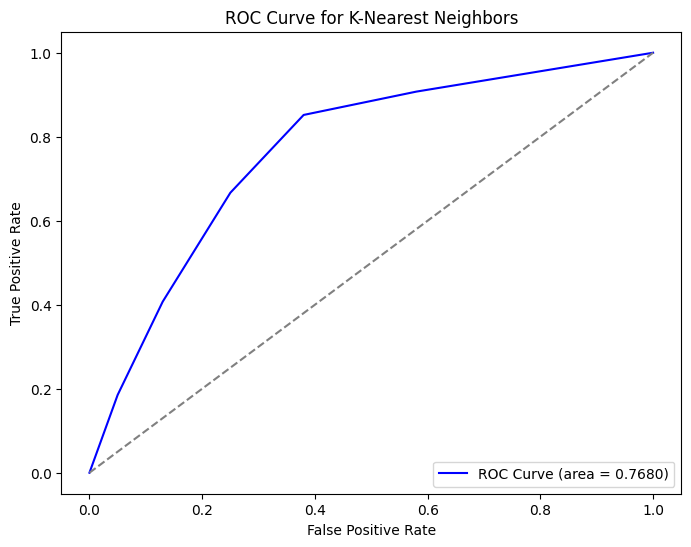

Cross-validation Mean Accuracy: 0.6874



In [35]:
# Evaluate each model
for name, model in models.items():
    if name == 'K-Nearest Neighbors':
        pipeline = ImbPipeline([('smote', smote), ('model', model)])
    else:
        pipeline = ImbPipeline([('undersample', undersample), ('smote', smote), ('model', model)])
    
    pipeline.fit(X_train_scaled, y_train)
    y_pred = pipeline.predict(X_test_scaled)
    # Check if the model has predict_proba
    if hasattr(pipeline, "predict_proba"):
        y_pred_prob = pipeline.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for ROC AUC
    else:
        y_pred_prob = y_pred  # Use the predicted labels directly if predict_proba is not available
    
    # Accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Sensitivity and Specificity
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    
    # ROC AUC
    if hasattr(pipeline, "predict_proba"):
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    else:
        roc_auc = accuracy  # ROC AUC is equivalent to accuracy for classifiers without predict_proba
        fpr, tpr, _ = [0, 1], [0, 1], [0.5]
    
    print(f"ROC AUC: {roc_auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.show()

    # Cross-validation scores
    cv_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=5)
    print(f"Cross-validation Mean Accuracy: {cv_scores.mean():.4f}\n")

In [36]:
# Create age bins
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
labels = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

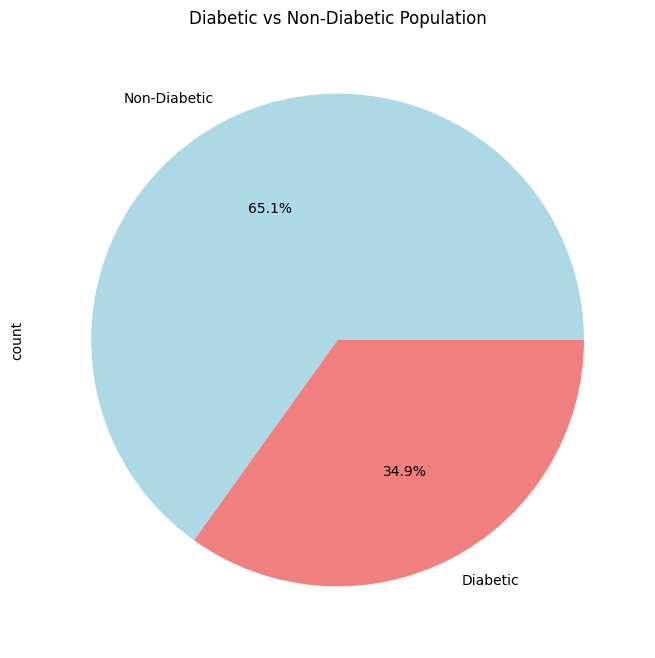

In [37]:
# a. Pie chart to describe the diabetic or non-diabetic population
outcome_counts = df['Outcome'].value_counts()
outcome_counts.plot.pie(autopct='%1.1f%%',labels=['Non-Diabetic','Diabetic'],colors=['lightblue', 'lightcoral'], figsize=(8, 8))
plt.title('Diabetic vs Non-Diabetic Population')
plt.show()

C:\Users\Family\AppData\Local\Temp\ipykernel_14240\312770037.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df[col])


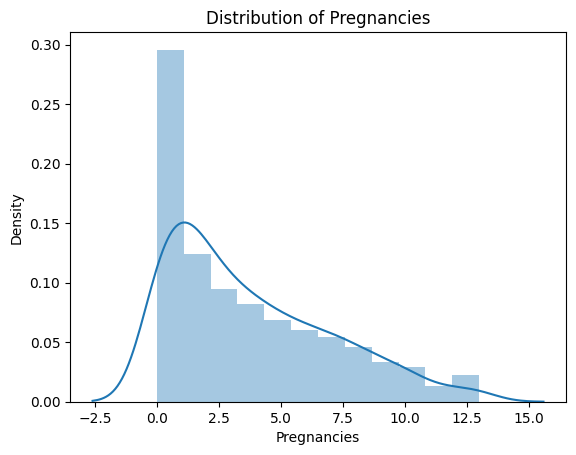

C:\Users\Family\AppData\Local\Temp\ipykernel_14240\312770037.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df[col])


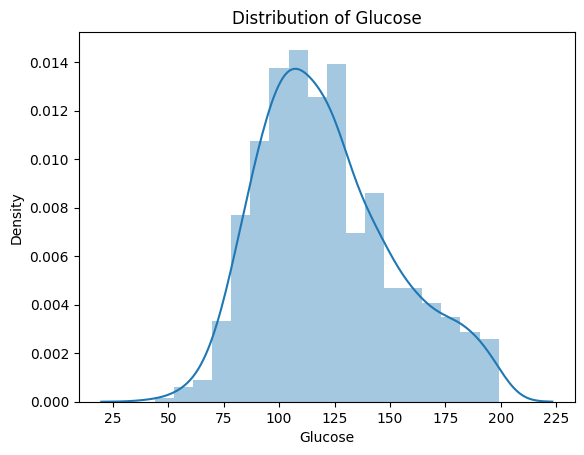

C:\Users\Family\AppData\Local\Temp\ipykernel_14240\312770037.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df[col])


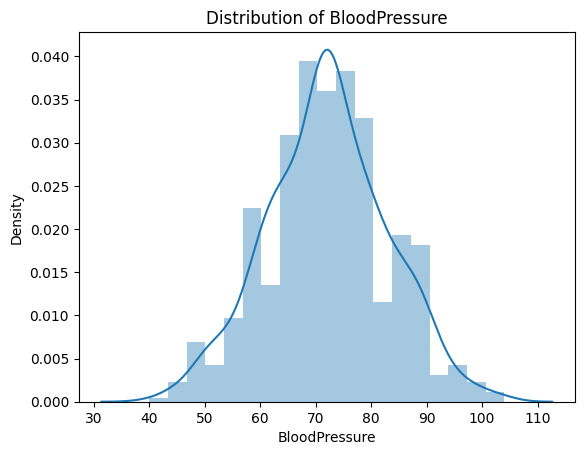

C:\Users\Family\AppData\Local\Temp\ipykernel_14240\312770037.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df[col])


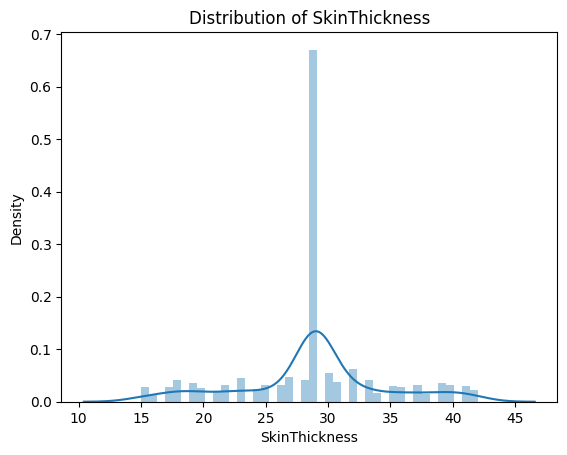

C:\Users\Family\AppData\Local\Temp\ipykernel_14240\312770037.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df[col])


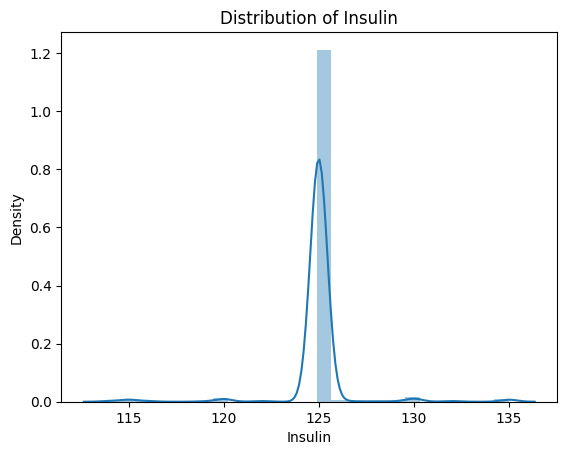

C:\Users\Family\AppData\Local\Temp\ipykernel_14240\312770037.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df[col])


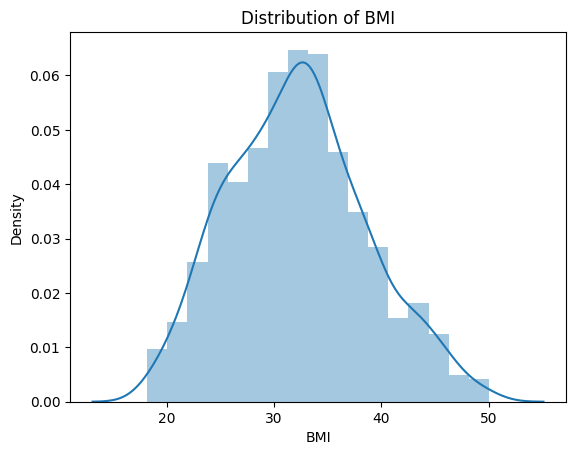

C:\Users\Family\AppData\Local\Temp\ipykernel_14240\312770037.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df[col])


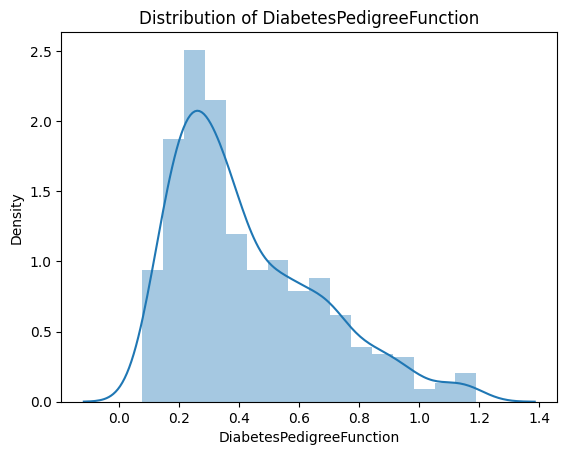

C:\Users\Family\AppData\Local\Temp\ipykernel_14240\312770037.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df[col])


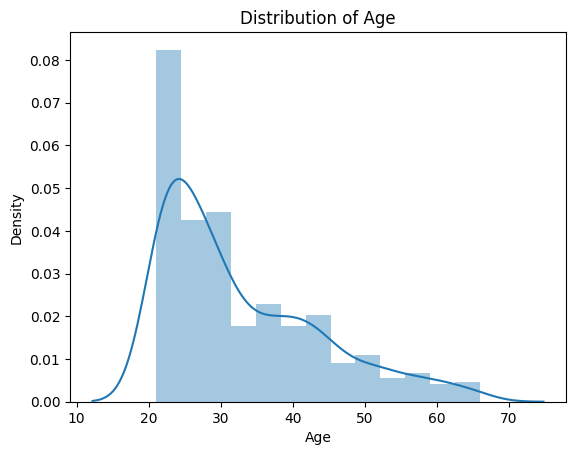

C:\Users\Family\AppData\Local\Temp\ipykernel_14240\312770037.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df[col])


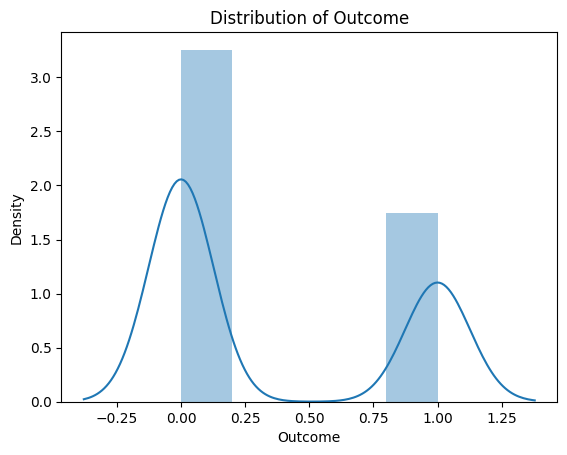

In [38]:
# Iterate over each column and create a histogram
for i, col in enumerate(cleaned_df.columns):
    plt.figure(i)
    sns.distplot(cleaned_df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

In [39]:
cleaned_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='BloodPressure', ylabel='BMI'>

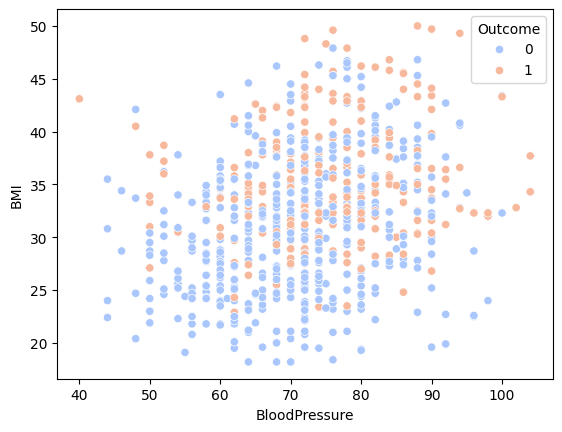

In [40]:
sns.scatterplot(data=cleaned_df, x='BloodPressure', y='BMI', hue='Outcome', palette='coolwarm')

In [41]:
cleaned_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.656250,72.108073,28.759115,124.972656,32.206380,0.427044,32.760417,0.348958
std,3.270644,30.438286,10.874178,5.766472,1.698387,6.410497,0.245323,11.055385,0.476951
min,0.000000,44.000000,40.000000,15.000000,114.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.000000,125.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.356000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,30.000000,125.000000,36.300000,0.582250,40.000000,1.000000
max,13.000000,199.000000,104.000000,42.000000,135.000000,50.000000,1.191000,66.000000,1.000000


In [42]:
cleaned_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Split the dataset into features and target
X = cleaned_df.drop(columns=['Outcome'])#Features
y = cleaned_df['Outcome']#Target

In [45]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score:  0.7801488404292142


In [46]:
# Re-train the Random Forest model with the best parameters
best_rf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7489
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       151
           1       0.63      0.65      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.75      0.75       231



In [47]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[121  30]
 [ 28  52]]


In [48]:
# Feature importance
importances = best_rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Print feature importance
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. feature {features[indices[i]]} ({importances[indices[i]]:.4f})")


Feature ranking:
1. feature Glucose (0.3633)
2. feature BMI (0.1732)
3. feature Age (0.1639)
4. feature DiabetesPedigreeFunction (0.0945)
5. feature Pregnancies (0.0668)
6. feature BloodPressure (0.0648)
7. feature SkinThickness (0.0606)
8. feature Insulin (0.0130)


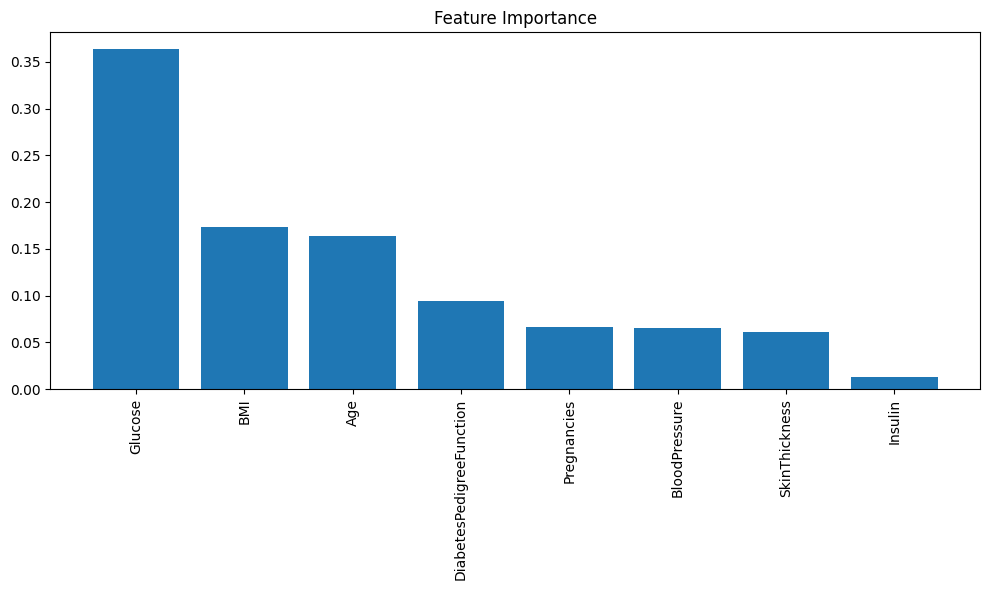

In [49]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

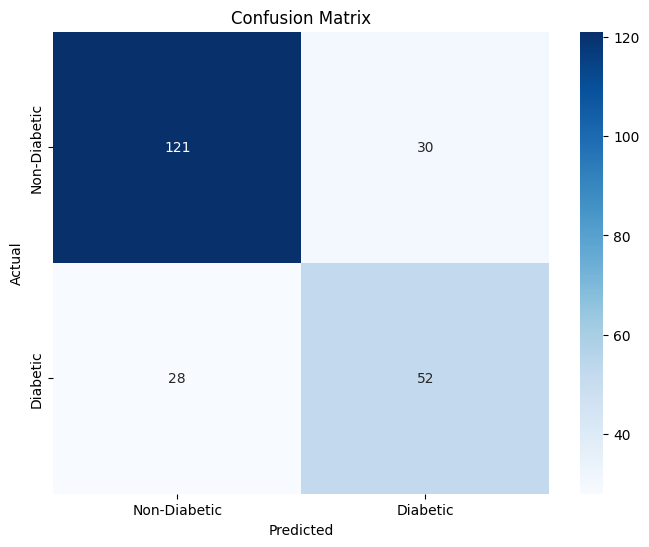

In [50]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [51]:
cleaned_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [52]:
test_point=[[3, 110, 35, 52, 30, 50, 0.627, 5]]

In [53]:
# Predict the outcome for the test point
prediction = best_rf.predict(test_point)
prediction_proba = best_rf.predict_proba(test_point)

print(f"Prediction for test point {test_point}: {'Diabetic' if prediction[0] == 1 else 'Non-Diabetic'}")
print(f"Prediction probabilities: {prediction_proba}")

Prediction for test point [[3, 110, 35, 52, 30, 50, 0.627, 5]]: Non-Diabetic
Prediction probabilities: [[0.50486346 0.49513654]]


C:\Users\Family\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Family\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,125.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,125.0,43.1,0.356,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,29.0,125.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,125.0,26.2,0.245,30.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0


In [55]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

In [57]:
feature_importances

,Feature,Importance
0,Pregnancies,0.081672
1,Glucose,0.288992
2,BloodPressure,0.092366
3,SkinThickness,0.074951
4,Insulin,0.013097
5,BMI,0.170859
6,DiabetesPedigreeFunction,0.127039
7,Age,0.151025


In [58]:
# Save feature importances to CSV
feature_importances.to_csv('feature_importances.csv', index=False)

In [60]:
from scipy.stats import multivariate_normal


# Select only the main variables
data = df[['Glucose', 'BMI', 'Age']]

# Fit a multivariate normal distribution to the data
mean = data.mean().values
cov = data.cov().values
rv = multivariate_normal(mean, cov)

# Create a grid of values
x = np.linspace(data['Glucose'].min(), data['Glucose'].max(), 50)
y = np.linspace(data['BMI'].min(), data['BMI'].max(), 50)
z = np.linspace(data['Age'].min(), data['Age'].max(), 50)

X, Y, Z = np.meshgrid(x, y, z)
pos = np.empty(X.shape + (3,))
pos[:, :, :, 0] = X
pos[:, :, :, 1] = Y
pos[:, :, :, 2] = Z

# Calculate the probability density function (PDF) values for the grid
pdf_values = rv.pdf(pos)

# Flatten the arrays for easier DataFrame creation
pdf_values_flat = pdf_values.ravel()
X_flat = X.ravel()
Y_flat = Y.ravel()
Z_flat = Z.ravel()

# Prepare data for Tableau
grid_data = pd.DataFrame({
    'Glucose': X_flat,
    'BMI': Y_flat,
    'Age': Z_flat,
    'PDF': pdf_values_flat
})


In [61]:
# Save to CSV for Tableau
grid_data.to_csv('multivariate_normal_grid.csv', index=False)

In [62]:
# Concatenate DataFrames side-by-side
merged_df = pd.concat([cleaned_df, feature_importances, grid_data], axis=1)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)

# Print the merged DataFrame
print(merged_df)

        Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6.0    148.0           72.0           35.0    125.0  33.6   
1               1.0     85.0           66.0           29.0    125.0  26.6   
2               8.0    183.0           64.0           29.0    125.0  23.3   
3               1.0     89.0           66.0           23.0    125.0  28.1   
4               0.0    137.0           40.0           35.0    125.0  43.1   
...             ...      ...            ...            ...      ...   ...   
124995          NaN      NaN            NaN            NaN      NaN   NaN   
124996          NaN      NaN            NaN            NaN      NaN   NaN   
124997          NaN      NaN            NaN            NaN      NaN   NaN   
124998          NaN      NaN            NaN            NaN      NaN   NaN   
124999          NaN      NaN            NaN            NaN      NaN   NaN   

        DiabetesPedigreeFunction   Age  Outcome        Feature  Importance 